## WEEK 12 HOMEWORK ASSIGNMENT, PART I

In [140]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### This is a TWO part assignment

### Part I:  Working with interpolation techniques (this Jupyter notebook)

### Part II:  Working with smoothing techniques, to produce the Mauna Lao carbon dioxide curve! (*separate Jupyter notebook*)

### So, you will be completing and turning in two separate Jupyter notebooks for this homework assignment!

## PART 1:  Interpolation of radiation data

### First, let's get some quick practice with 1D interpolation, to fill in NaNs!
*Data*
- radiation data collected every 30 minutes near Champaign (so cool! a much higher temporal resolution than the radiation data we've looked at previously!)
- **focus: GHI (total solar radiation)**
<br><br>

**!!!!!!!!!!!!!!! ALERT !!!!!!!!!!!!!!!!!!!**
- you worked with reading in this data last week and decoding date-time stuff, so please use that code for reading in and initial processing!

#### (a.) Read in data + decode date-time, set the decoded date time to be your index
- use the code you wrote for this last week!

In [141]:
df = pd.read_csv('data/week12/889299_40.13_-88.26_2019.csv', header=2, 
                 parse_dates={'date':['Year', 'Month', 'Day', 'Hour', 'Minute']})
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
ind = pd.to_datetime(df['date'], format='%Y %m %d %H %M')
df = df.set_index(ind)
df = df.drop('date', 1)

/tmp/ipykernel_225/3754039085.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date', 1)


#### (b.) Access only the rows from July 1 at 00:00 to July 7 at 00:00 and save in a new dataframe.  *All subsequent questions in this exercise will use this data from the first week of July.*

In [142]:
df = df.loc['2019-07-01 00:00:00':'2019-07-07 00:00:00']

#### (c.) How many rows have NaNs?

In [143]:
print(f'# of rows containing NaN in DF: {df.shape[0] - df.dropna().shape[0]}')

# of rows containing NaN in DF: 10


#### (d.) Create a line plot of *GHI*, which is the total solar radiation. Everything subsequent in this exercise will use GHI only.

<AxesSubplot:title={'center':'Measured Solar Radiation'}, xlabel='Date', ylabel='Global Horizontal Irradiance'>

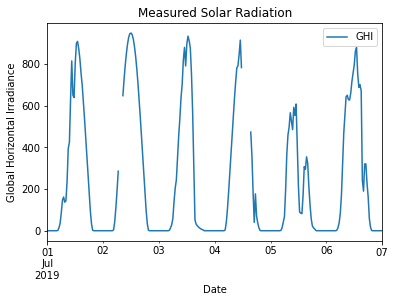

In [144]:
df.plot(y='GHI', 
        title='Measured Solar Radiation', 
        ylabel='Global Horizontal Irradiance',
        xlabel='Date')

#### (e.) Use the *interpolate* function in Pandas to fill in NaNs in the following three scenarios. 
  - (i.) Regardless of how many consecutive NaNs there are (this can be v. dangerous)
<br><br>
  - (ii.) Only if there are no more than 4 consecutive NaNs (no more than 2 hours of missing data, consecutively, as observations are every 30 minutes)
<br><br>
  - (iii.) Like (i.), but using a *different* interpolation method within the pandas interpolate function, of your choice

In [145]:
repeats = []
repeats.append(('No Limit', df['GHI'].interpolate()))
repeats.append(('Limited (Limit=4)', df['GHI'].interpolate(limit=4)))
repeats.append(('Nearest-Neighbor (No Limit)', df['GHI'].interpolate(method='nearest')))

#### (f.) Finally, create a panel plot of three supblots, one for each of the scenarios in (g.), plotted against the raw data from the first week in July.  


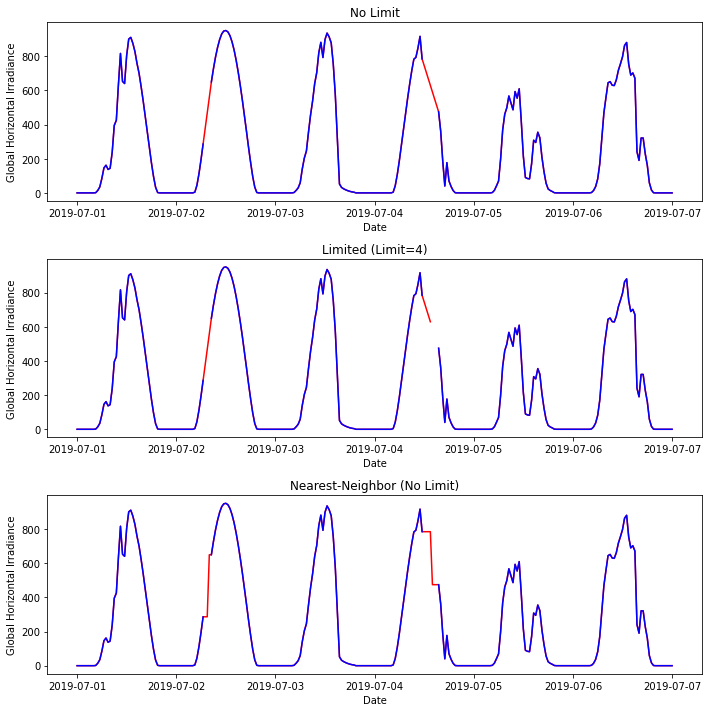

In [146]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
for i, ax in enumerate(axs):
    ax.plot(df.index, repeats[i][1], c='red')
    ax.plot(df.index, df['GHI'], c='blue')
    ax.set_title(repeats[i][0])
    ax.set_xlabel('Date')
    ax.set_ylabel('Global Horizontal Irradiance')
plt.tight_layout()

#### (g.) What differences do you notice between these three different ways of interpolating your data?  Please discuss, specifically, in *at least* a few sentences

While using interpolation with no limit in this manner produces a fairly accurate result in this situation, the linear behavior exhibited here would in no way be desireable in all situations. For example, while using no limit fairly closely models the relationship at hand in this situation, it might be better represented by using a kernel function that is more parabolic in behavior.

Using a limit makes sense for situations where the data would make no sense outside of a window, but in this case I would likely opt to not enforce a limit as small as 4.

Nearest-neighbor interpolation is interesting here because of the stepped relationship it gives. While this is a poor interpolative method for this situation, this method could be useful in a variety of signal processing techniques to implement things such as gating for noise reduction purposes.